# Spam Text message classification using NLP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
path = r'C:\Users\Mtronics\Downloads\spam.tsv.txt'
df = pd.read_csv(path, sep='\t')

In [8]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [9]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [10]:
len(df)

5572

In [11]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [12]:
ham = df[df['label'] == 'ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [13]:
spam = df[df['label'] == 'spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [14]:
spam.shape, ham.shape

((747, 4), (4825, 4))

## Balancing the dataset

In [15]:
ham = ham.sample(spam.shape[0])

In [17]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [20]:
data = ham.append(spam, ignore_index = True)
data.head()

,label,message,length,punct
0,ham,Sorry dude. Dont know how i forgot. Even after...,93,5
1,ham,"Yeah, don't go to bed, I'll be back before mid...",51,4
2,ham,Eatin my lunch...,17,3
3,ham,Oh unintentionally not bad timing. Great. Fing...,104,4
4,ham,Becoz its &lt;#&gt; jan whn al the post ofic...,108,8


In [21]:
data.tail()

,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


## EDA

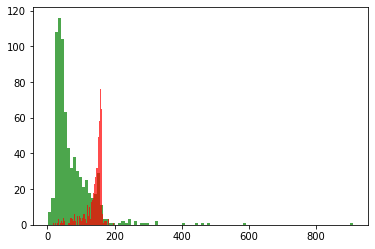

In [33]:
h = data[data['label'] == 'ham']['length']
s = data[data['label'] == 'spam']['length']

plt.hist(h, bins = 100, color = 'g', alpha = 0.7)
plt.hist(s, bins = 100, color = 'r', alpha = 0.7)
plt.show()

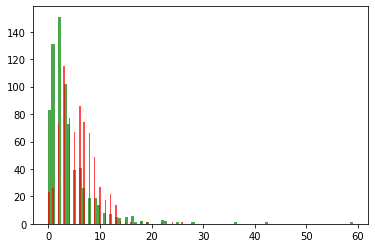

In [35]:
hl = data[data['label'] == 'ham']['punct']
sl = data[data['label'] == 'spam']['punct']

plt.hist(hl, bins = 100, color = 'g', alpha = 0.7)
plt.hist(sl, bins = 100, color = 'r', alpha = 0.7)
plt.show()

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size =0.2, shuffle = True, 
                                                    random_state = 42)

In [51]:
X_train.shape, X_test.shape

((1195,), (299,))

## Random Forest Pipeline

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

clf = Pipeline([('tfidf', TfidfVectorizer()),
         ('clf', RandomForestClassifier(n_estimators = 100))])

In [54]:
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier())])

In [55]:
y_pred = clf.predict(X_test)

In [56]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[145,   0],
       [ 17, 137]], dtype=int64)

In [59]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.90      1.00      0.94       145
        spam       1.00      0.89      0.94       154

    accuracy                           0.94       299
   macro avg       0.95      0.94      0.94       299
weighted avg       0.95      0.94      0.94       299



In [62]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9431438127090301

In [63]:
clf.predict(['Hey! you have won the tickets. Text Won to get your tickets on 55667'])

array(['spam'], dtype=object)